<img src="deu_mole_e_vapo.gif" width="400">

In [21]:
#   __  __                       ____  _   _____               
#  |  \/  | __ _ _ __ ___ ___   |  _ \(_) |_   _|__  _ __ ___  
#  | |\/| |/ _` | '__/ __/ _ \  | | | | |   | |/ _ \| '__/ _ \ 
#  | |  | | (_| | | | (_| (_) | | |_| | |   | | (_) | | | (_) |
#  |_|  |_|\__,_|_|  \___\___/  |____/|_|   |_|\___/|_|  \___/  150 | GES

## 1. Juntando


In [22]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

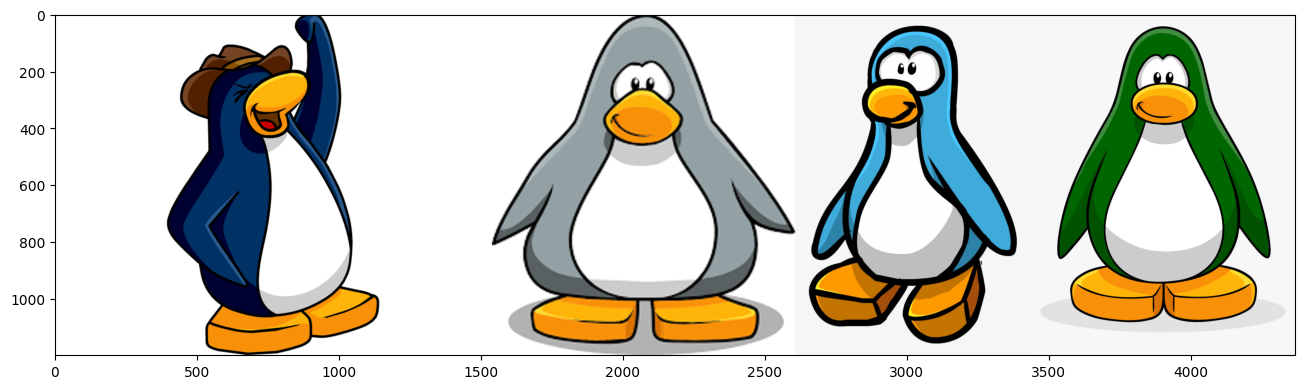

In [23]:
IMAGES = [
    "P1.png",
    "P2.png",
    "P3.jpg",
    "P4.png"
]


def load_images() -> tuple:
    images = []
    for path in IMAGES:
        img = Image.open(path)

        if img.mode != "RGB":
            img = img.convert("RGB")
            
        images.append(np.array(img))
    
    return tuple(images)


def resize_height(image: np.ndarray, height_px: float) -> np.ndarray:
    h, w = image.shape[:2]

    new_width = int(w * (height_px / h))

    return np.array(Image.fromarray(image).resize((new_width, height_px)))


images = load_images()
height = 1_200
images_resized = [resize_height(image, height) for image in images]

# Juntado os 4 esquisitos
os_4_esquisitos = np.concatenate(images_resized, axis=1)

plt.figure(figsize=[16, 16])
plt.imshow(os_4_esquisitos)

## 2. Trocando cores

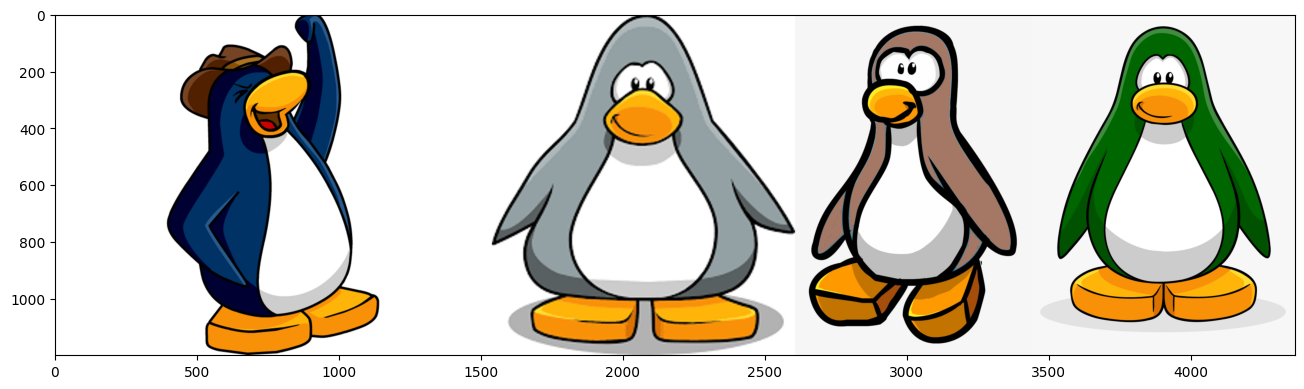

In [24]:

def change_color(image: np.ndarray) -> np.ndarray:
  color_of_the_year = [164, 120, 100] # https://www.pantone.com/color-of-the-year/2025
  
  os_4_esquisitos_copia = os_4_esquisitos.copy()

  # Separando os canais (R G B)
  r, g, b = os_4_esquisitos[:, :, 0], os_4_esquisitos[:, :, 1], os_4_esquisitos[:, :, 2]

  # 🎭
  penguin_blue_mask = (r >= 42) & (r <= 80) & (g >= 130) & (g <= 200) & (b >= 167) & (b <= 255)  # Range de azuis similares ao 🐧

  # Aplicando a cor do ano
  os_4_esquisitos_copia[penguin_blue_mask] = color_of_the_year

  return os_4_esquisitos_copia


os_4_esquisitos_cor_trocada = change_color(os_4_esquisitos)

plt.figure(figsize=(16, 16))
plt.imshow(os_4_esquisitos_cor_trocada)

## 3. Espelhando

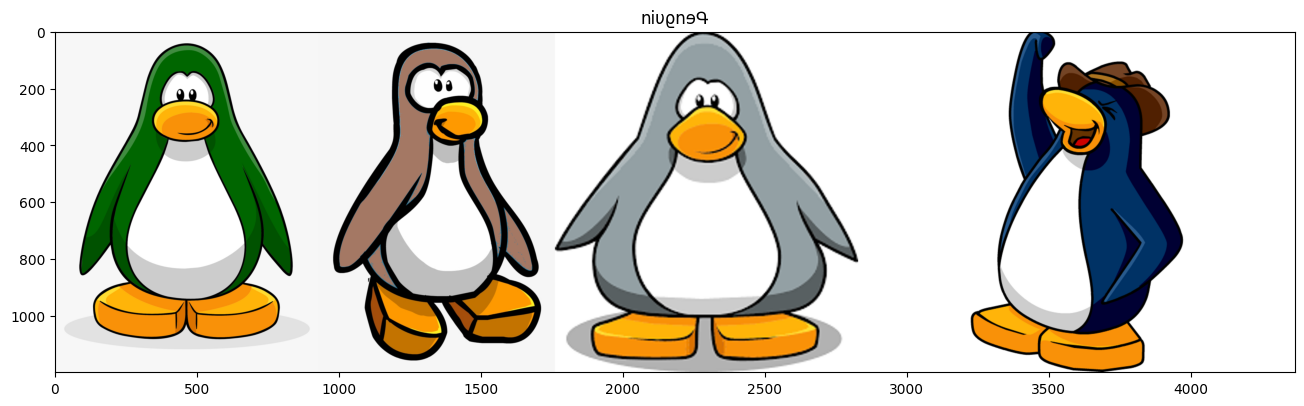

In [25]:
def mirror_x(image: np.ndarray) -> np.ndarray:
  return image[:, ::-1]


esquisitos_espelhados = mirror_x(os_4_esquisitos_cor_trocada);

plt.figure(figsize=(16, 16))
plt.title("niυϱnɘԳ")
plt.imshow(esquisitos_espelhados)


## 4. Recortando

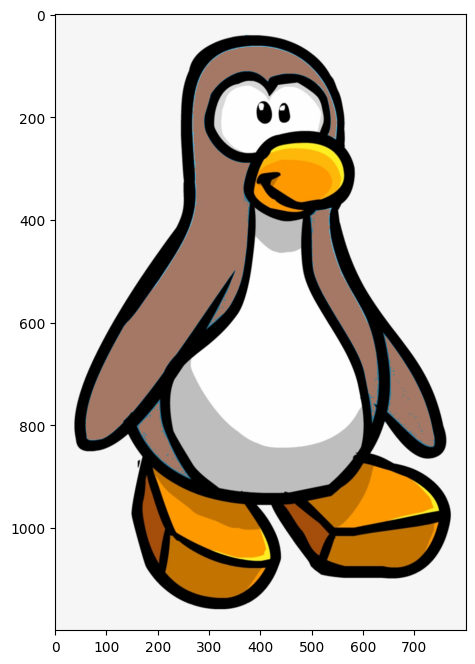

In [26]:
def crop_image(image: np.ndarray) -> np.ndarray:
  return image[:, 942:1742]


esquisito_favorito = crop_image(esquisitos_espelhados)

plt.figure(figsize=(8, 8))
plt.imshow(esquisito_favorito)

## 5. Histograma

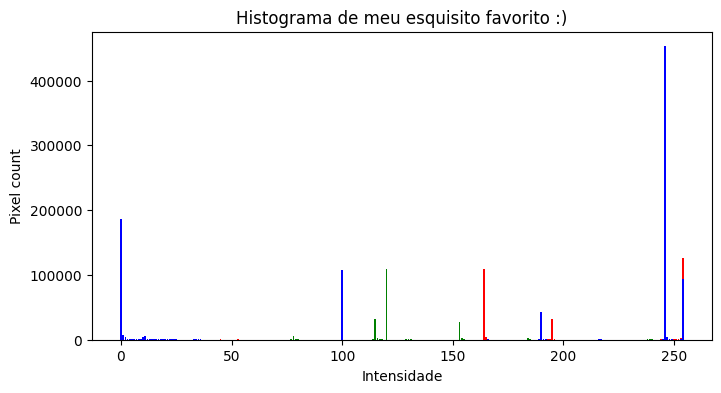

In [27]:
def draw_histogram(image: np.ndarray, image_name: str) -> None:
  plt.figure(figsize=(8, 4))
  plt.title(f"Histograma de {image_name}")

  # Calculando histograma
  hist_r, _ = np.histogram(image[:,:,0], bins=255, range=[0, 255])
  hist_g, _ = np.histogram(image[:,:,1], bins=255, range=[0, 255])
  hist_b, _ = np.histogram(image[:,:,2], bins=255, range=[0, 255])

  # Plotando os canais
  plt.bar(range(255), hist_r, color='red')
  plt.bar(range(255), hist_g, color='green')
  plt.bar(range(255), hist_b, color='blue')

  # Adicionando labels
  plt.xlabel("Intensidade")
  plt.ylabel("Pixel count")


draw_histogram(esquisito_favorito, "meu esquisito favorito :)")

## 6. Convertendo pixels a baixo do threshold

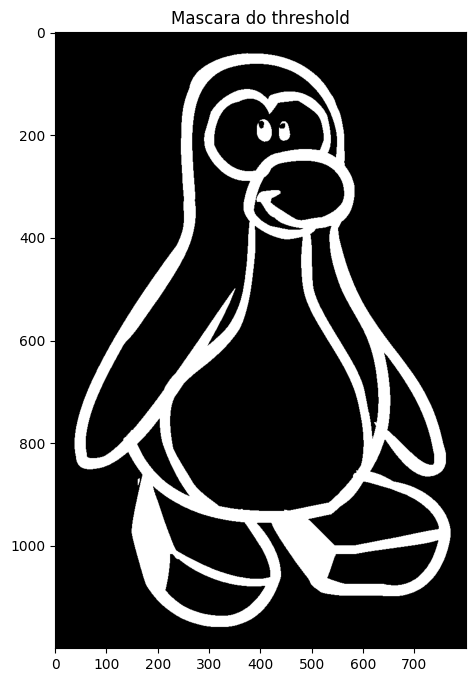

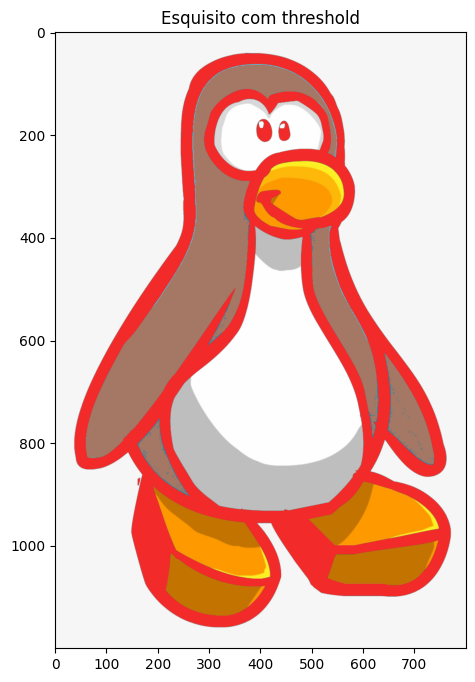

In [46]:
threshold = 100

esquisito_threshold = esquisito_favorito.copy()

# Calculando a luminosidade usando pesos perceptivos
luminosidade = 0.299 * esquisito_threshold[:, :, 0] + \
               0.587 * esquisito_threshold[:, :, 1] + \
               0.114 * esquisito_threshold[:, :, 2]

# Vermelho onde a luminosidade for MENOR que o threshold
mask = luminosidade < threshold
esquisito_threshold[mask] = [242, 42, 42]  

# 🎭
plt.figure(figsize=(8, 8))
plt.title("Mascara do threshold")
plt.imshow(mask, cmap="gray")

# 🎭
plt.figure(figsize=(8, 8))
plt.title("Esquisito com threshold")
plt.imshow(esquisito_threshold)